In [2]:
from pathlib import Path 
from astropy.io import fits
import numpy as np
import healpy as hp
import scipy as sp
import scipy.interpolate as interp
import matplotlib.pyplot as plt

Filename: ../../data/FermiData/gll_iem_v07.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (2880, 1441, 28)   float32   
  1  ENERGIES      1 BinTableHDU     12   28R x 1C   [D]   


 SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                 2880                                                  NAXIS2  =                 1441                                                  NAXIS3  =                   28                                                  EXTEND  =                    T                                                  CRVAL1  =                    0                                                  CDELT1  =               -0.125                                                  CRPIX1  =               1440.5     

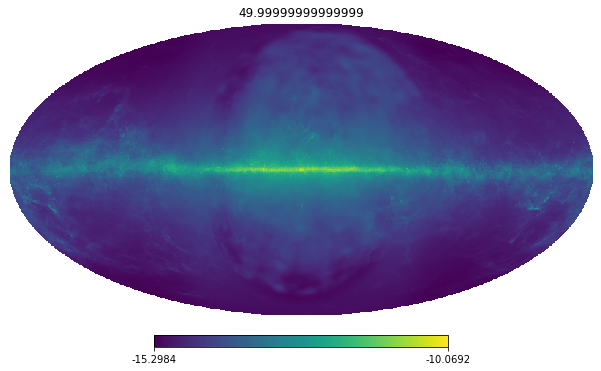

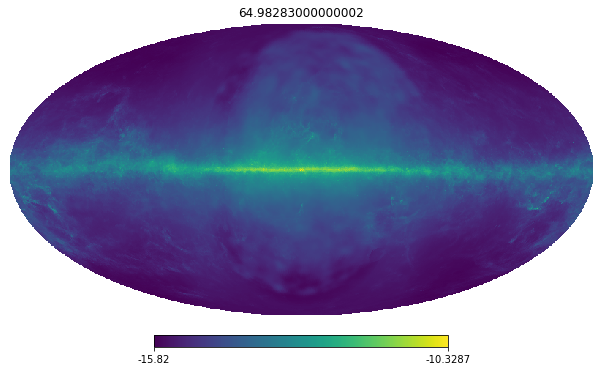

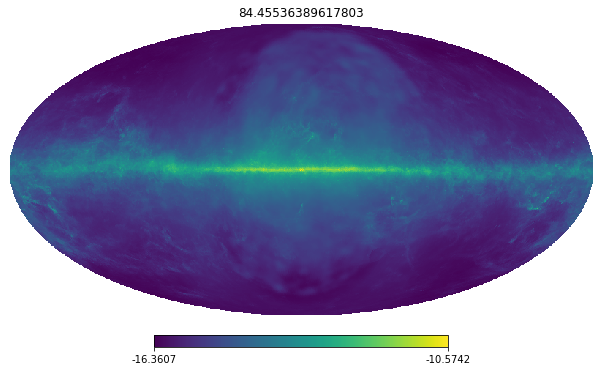

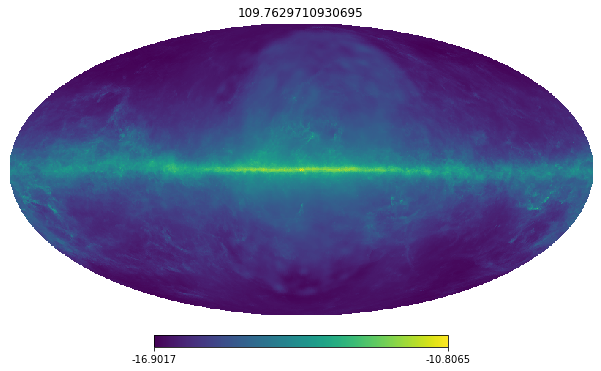

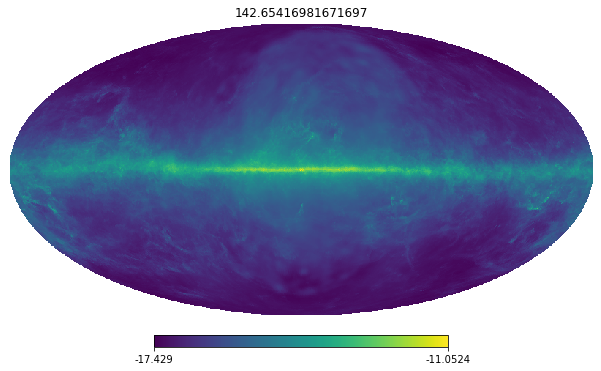

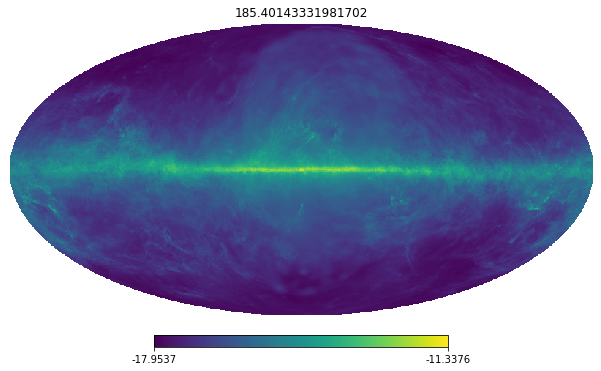

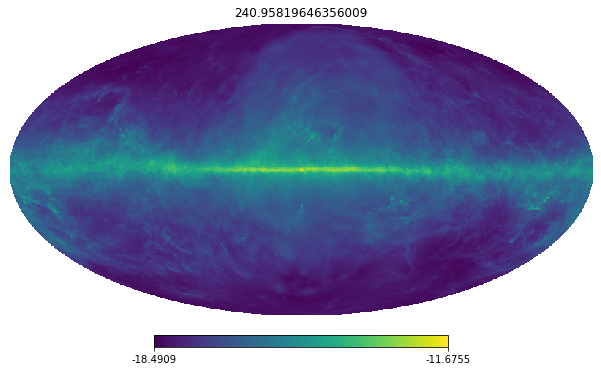

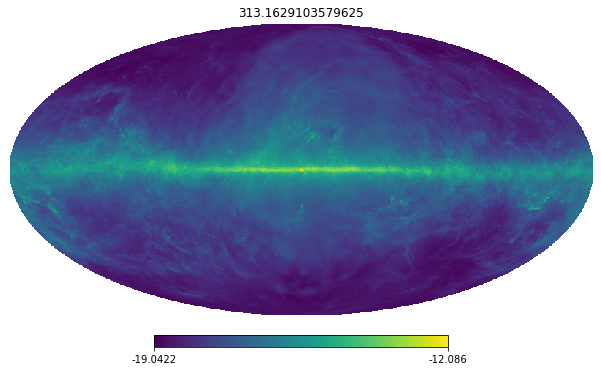

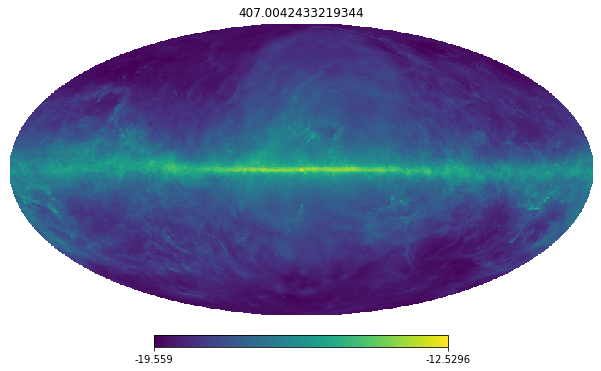

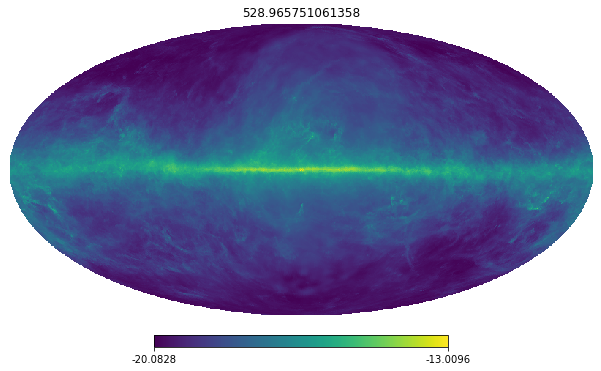

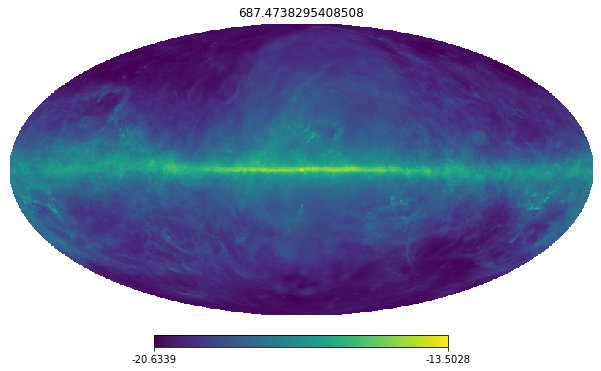

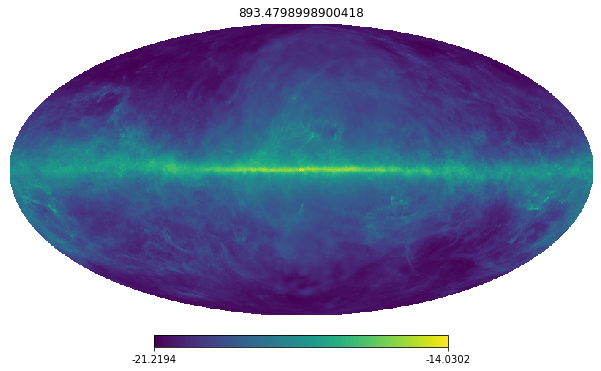

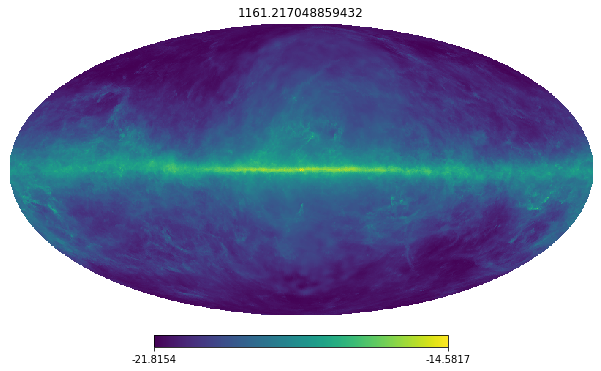

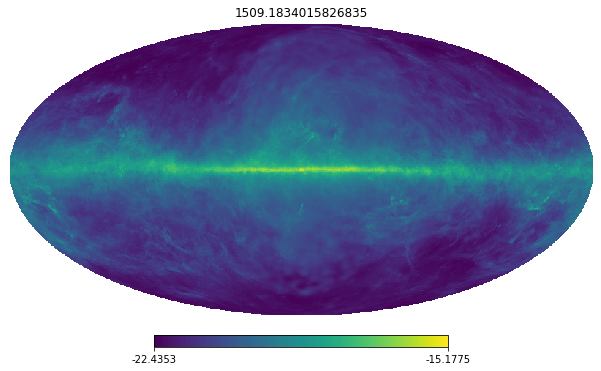

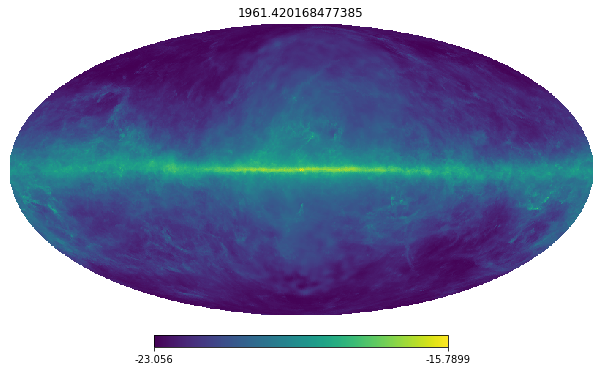

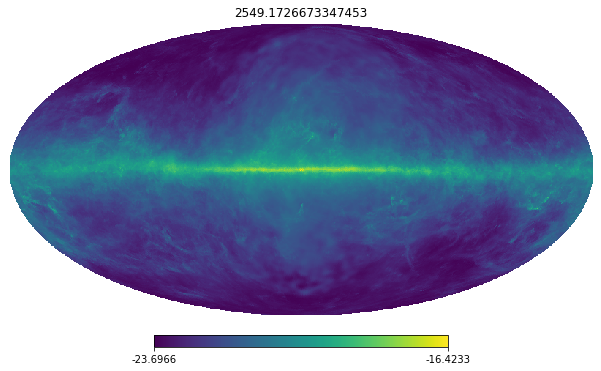

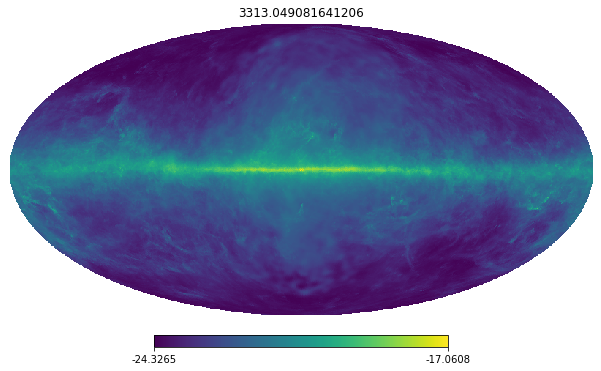

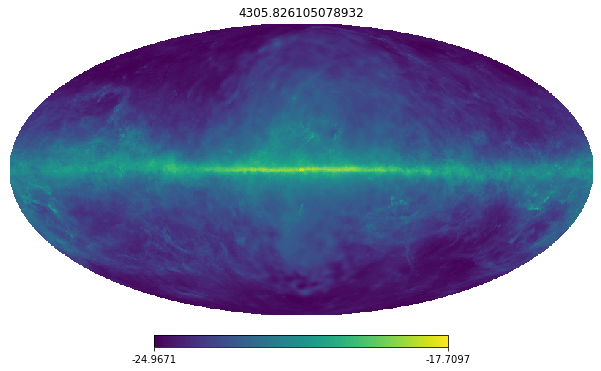

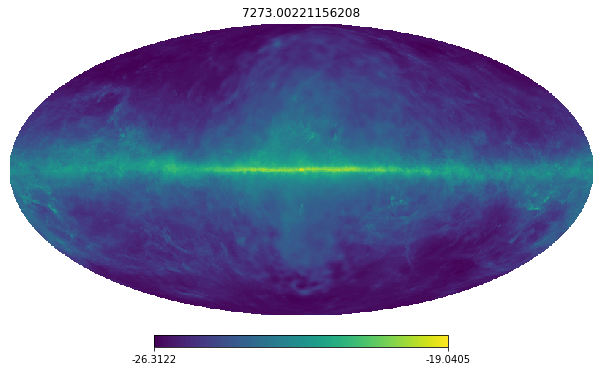

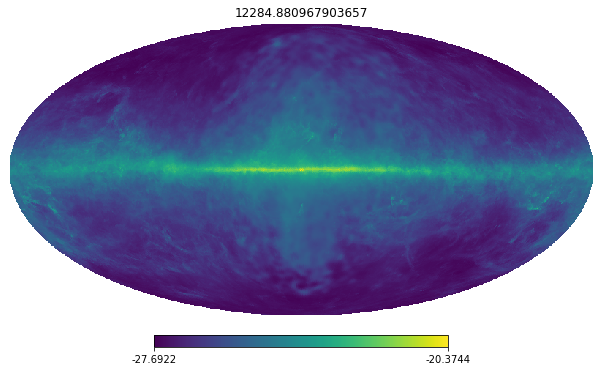

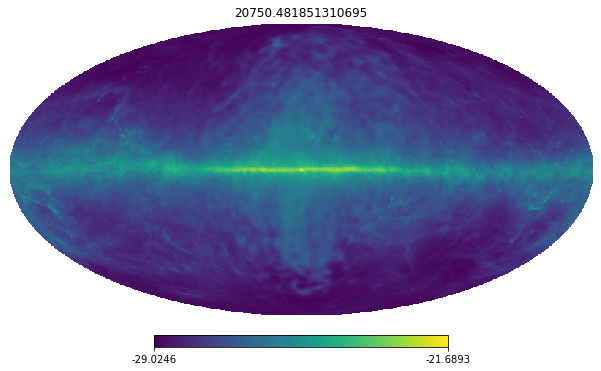

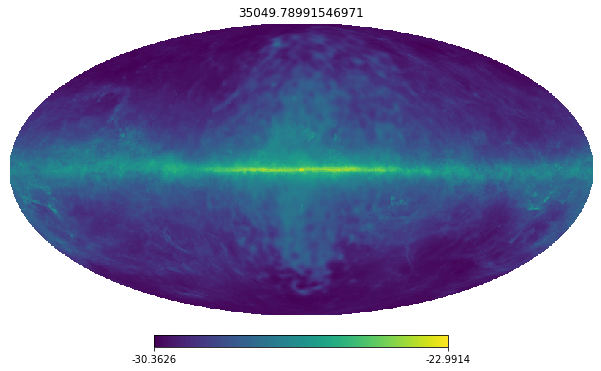

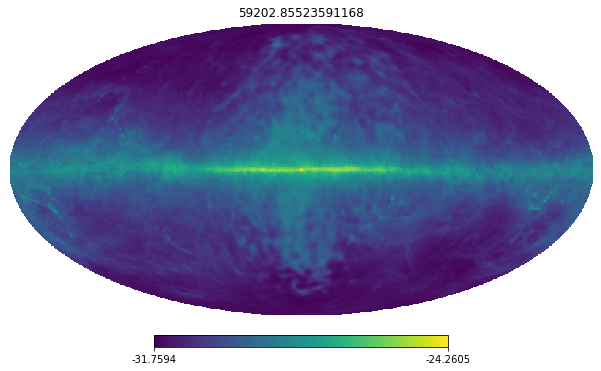

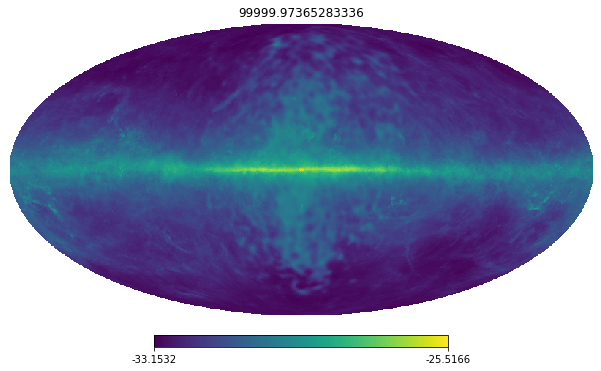

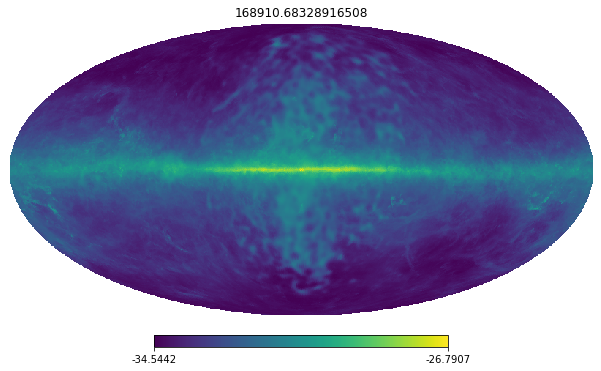

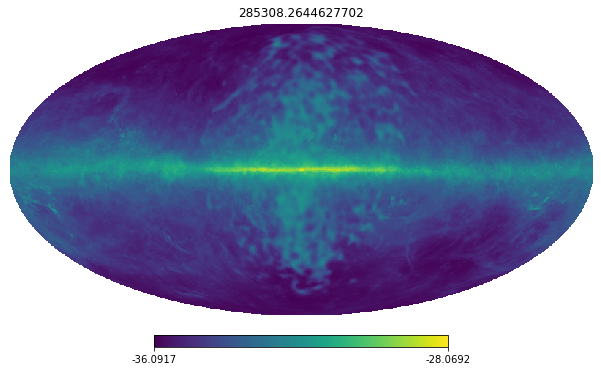

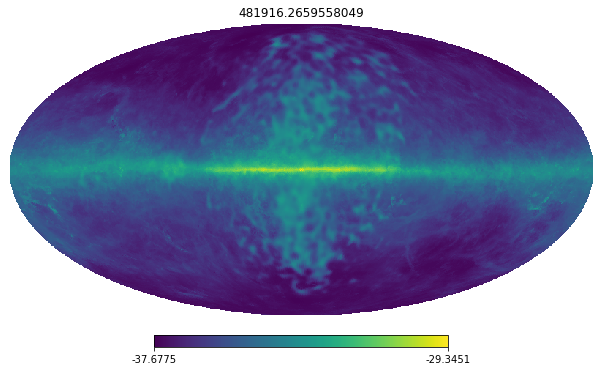

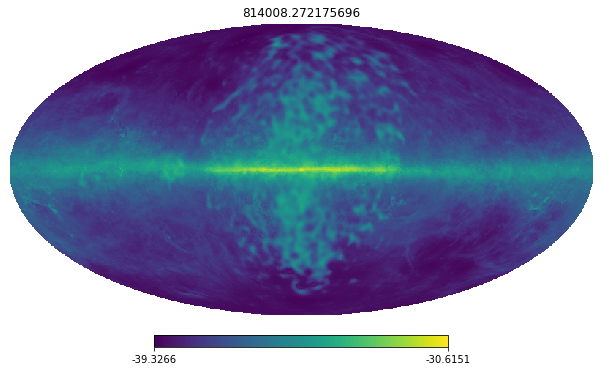

In [5]:
file = '../../data/FermiData/gll_iem_v07.fits'
hdul = fits.open(file)
hdul.info()
print('\n\n', hdul['PRIMARY'].header)
print('\n\n', hdul['ENERGIES'].header)
energy = np.concatenate(hdul['ENERGIES'].data)

data = np.concatenate((hdul['PRIMARY'].data[:,:,1440:], hdul['PRIMARY'].data[:,:,:-1440]), axis=2)
data = np.flip(data, axis = 2)
data = np.concatenate((data, data[:,:, 0:1]), axis=2)
data = data.T
print(data.shape)
lon = np.linspace(0, 360, 2881)
lat = np.linspace(-90, 90, 1441)
nside = 2**7
npix = int(hp.nside2npix(nside))
angs_lon, angs_lat = hp.pix2ang(nside, np.linspace(0, npix-1, npix).astype('int'), lonlat=True)
for e in energy:
    angs_engs = np.array([angs_lon, angs_lat, e*np.ones(npix)]).T
    vals = interp.interpn((lon, lat, energy), data, angs_engs)
    hp.mollview(np.log(vals), title=f'{e}')